# Week 4: Eigenvalues and Eigenvectors

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Definition

When we apply a linear transformation A (transformation matrix) to vectors, for example basis vectors $e_1$ and $e2$: their length and direction change. Eigenvector $v$ otherwise only changes their length after linear transformation. For $v$, the transformation is $Av = \lambda v$. The scaling factor $\lambda$ is the eigenvalue.

We have that $\forall$ $kv$ $(k \in \R, k ≠ 0)$, $A(kv) = k(Av) = k\lambda x = \lambda (kv)$. This can be applied to linearly transforming a vast number of vectors without complicated matrix multiplication. We can represent every vector as the linear combination of the eigenvectors corresponding to their spaces, then scaling combination by $\lambda$. 

This further means that there are indefinitely many eigenvectors corresponding to one eigenvalue (on the same straight line). Usually we choose one of them to be the eigenvector.

We find eigenvectors and eigenvalues using `np.linalg.eig()`.

In [62]:
A = np.array([[3, 2], [3, 1]])
A_eigenvalues, A_eigenvectors = np.linalg.eig(A)
A_eigenvalues, A_eigenvectors

(array([ 4.64575131, -0.64575131]),
 array([[ 0.7721779 , -0.48096517],
        [ 0.6354064 ,  0.8767397 ]]))

In [63]:
def plot_transformation(T,v1,v2):
    
    color_original = "#129cab"
    color_transformed = "#cc8933"
    
    _, ax = plt.subplots(figsize=(7, 7))
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xticks(np.arange(-6, 6))
    ax.set_yticks(np.arange(-6, 6))
    
    plt.axis([-6, 6, -6, 6])
    plt.quiver([0, 0],[0, 0], [v1[0], v2[0]], [v1[1], v2[1]], color=color_original, angles='xy', scale_units='xy', scale=1)
    plt.plot([0,v2[0],v1[0]+v2[0],v1[0]], 
        [0,v2[1],v1[1]+v2[1],v1[1]], 
        color=color_original)
    v1_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(v1)])
    ax.text(v1[0]-0.2+v1_sgn[0], v1[1]-0.2+v1_sgn[1], f'$v_1$', fontsize=14, color=color_original)
    v2_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(v2)])
    ax.text(v2[0]-0.2+v2_sgn[0], v2[1]-0.2+v2_sgn[1], f'$v_2$', fontsize=14, color=color_original)
    
    v1_transformed = T @ v1
    v2_transformed = T @ v2
    
    plt.quiver([0, 0],[0, 0], [v1_transformed[0], v2_transformed[0]], [v1_transformed[1], v2_transformed[1]], 
               color=color_transformed, angles='xy', scale_units='xy', scale=1)
    plt.plot([0,v2_transformed[0],v1_transformed[0]+v2_transformed[0],v1_transformed[0]], 
             [0,v2_transformed[1],v1_transformed[1]+v2_transformed[1],v1_transformed[1]], 
             color=color_transformed)
    v1_transformed_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(v1_transformed)])
    ax.text(v1_transformed[0]-0.2+v1_transformed_sgn[0], v1_transformed[1]-v1_transformed_sgn[1], 
            f'$T(v_1)$', fontsize=14, color=color_transformed)
    v2_transformed_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(v2_transformed)])
    ax.text(v2_transformed[0]-0.2+v2_transformed_sgn[0], v2_transformed[1]-v2_transformed_sgn[1], 
            f'$T(v_2)$', fontsize=14, color=color_transformed)
    
    
    plt.gca().set_aspect("equal")
    plt.show()

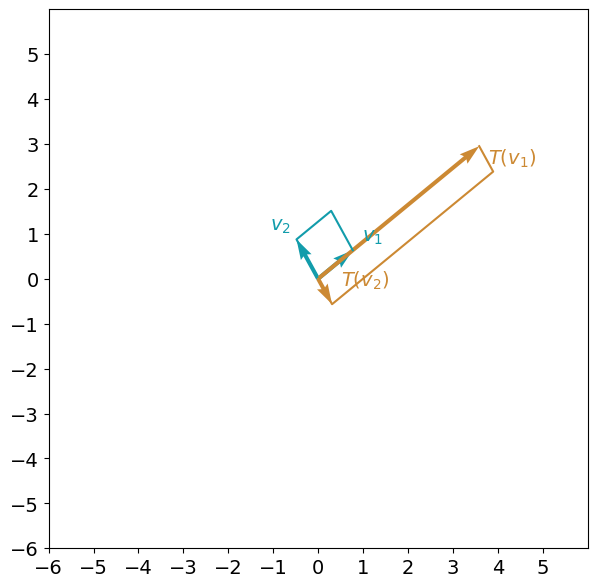

In [64]:
plot_transformation(A, A_eigenvectors[:,0], A_eigenvectors[:,1]) # not [0] and [1] because eigenvectors are columns.

## 2. Standard Transformation in a Plane

### 2.1 - Reflection about y-axis

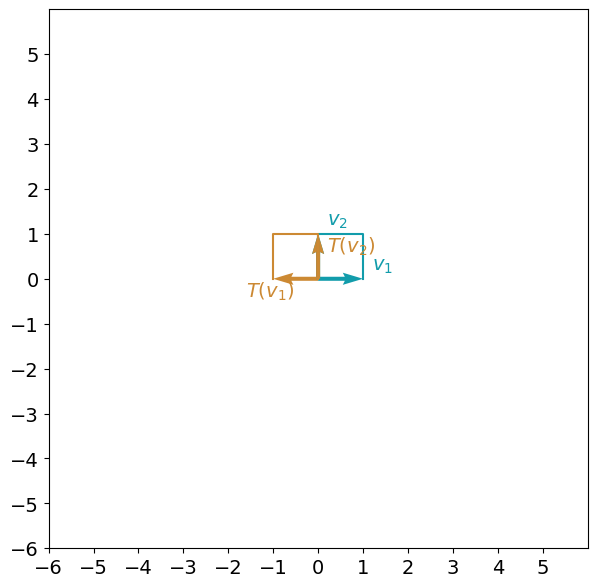

In [65]:
A_reflection_vertical = np.array([[-1, 0], [0, 1]])
A_reflection_vertical_eigenvectors = np.linalg.eig(A_reflection_vertical)[1]
plot_transformation(A_reflection_vertical, A_reflection_vertical_eigenvectors[:,0], A_reflection_vertical_eigenvectors[:,1])

### 2.2 - Shear in x-direction

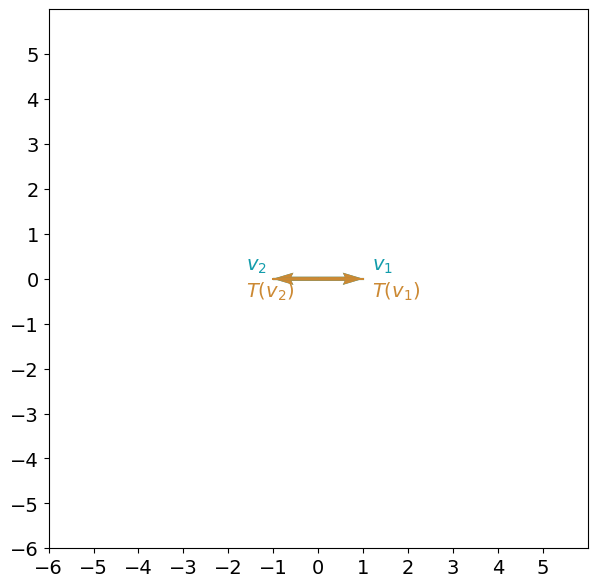

In [74]:
A_shear_x = np.array([[1, 1], [0, 1]]) # [0 1] -> [0.5, 1] 
A_shear_x_eigenvectors = np.linalg.eig(A_shear_x)[1]
plot_transformation(A_shear_x, A_shear_x_eigenvectors[:,0], A_shear_x_eigenvectors[:,1])

### 2.3 - 90-D degrees clockwise rotation

In [79]:
A_rotation = np.array([[0, 1],[-1, 0]]) # [[1, 0], [0, 1]] -> [[0, 1], [-1, 0]]
A_rotation_eigenvalues, A_rotation_eigenvectors = np.linalg.eig(A_rotation)
A_rotation_eigenvalues, A_rotation_eigenvectors

(array([0.+1.j, 0.-1.j]),
 array([[0.70710678+0.j        , 0.70710678-0.j        ],
        [0.        +0.70710678j, 0.        -0.70710678j]]))

The eigenvvalues are complex numbers, so there are no real $\lambda \in \R$. There are no vectors that keep their direction after 90 degree rotation

### 2.4 - Identity Matrix and Scaling in All Directions

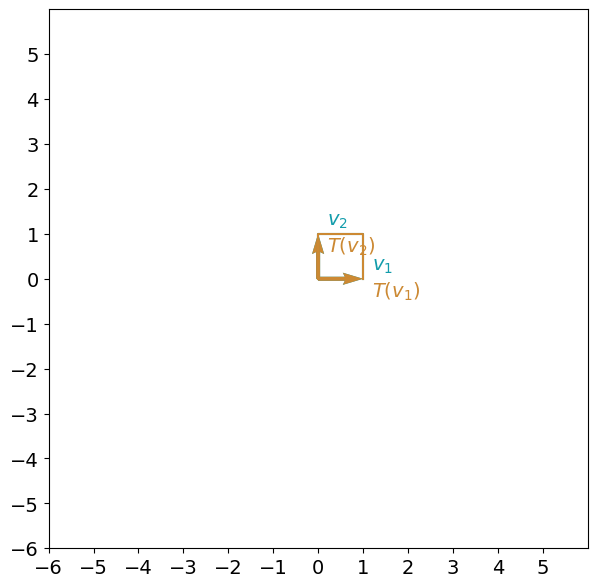

In [80]:
A_identity = np.array([[1, 0], [0, 1]]) # no change to the vector
A_identity_eigenvectors = np.linalg.eig(A_identity)[1]
plot_transformation(A_identity, A_identity_eigenvectors[:,0], A_identity_eigenvectors[:,1])

### 2.5 - Projection onto x-axis

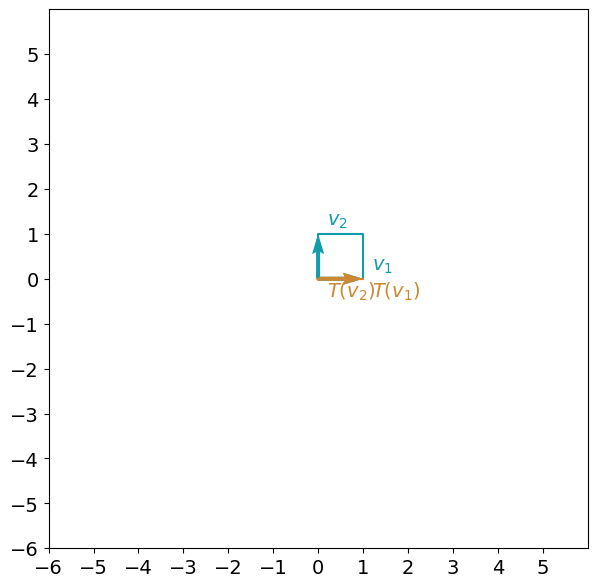

In [81]:
A_projection_x = np.array([[1, 0], [0, 0]])
A_projection_x_eigenvectors = np.linalg.eig(A_projection_x)[1]
plot_transformation(A_projection_x, A_projection_x_eigenvectors[:,0], A_projection_x_eigenvectors[:,1])